In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
os. getcwd()

'C:\\Users\\Ramon\\Desktop\\SudokuSolvers\\src\\statistics_data'

In [5]:
heuristics =['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS']
sizes = ['4x4', '9x9']
for size in sizes:
    for heuristic in heuristics:
        filename = size+'/'+heuristic+'.csv'
        df = pd.read_csv(filename)
        #print(df)
        print(size + ' ',heuristic + ' mean time: ',df['Time'].mean())
    print('-------------------')
    
filename = '9x9'+'/'+'VSIDS'+'.csv'
df = pd.read_csv(filename)
df.sort_values(by=["Time"]) ## yikes.

4x4  None mean time:  0.0027707149982452
4x4  DLCS mean time:  0.002700836896896323
4x4  DLISN mean time:  0.0032182950973510312
4x4  DLISP mean time:  0.002826662778854349
4x4  MOMS mean time:  0.002760466098785382
4x4  VSIDS mean time:  0.002904181957244833
-------------------
9x9  None mean time:  0.6703439130783081
9x9  DLCS mean time:  1.1164331886768342
9x9  DLISN mean time:  0.9898407735824585
9x9  DLISP mean time:  0.6643650755882263
9x9  MOMS mean time:  0.6564850664138794
9x9  VSIDS mean time:  4.879515527009964
-------------------


,Unnamed: 0,start Length,Time,Branches,Unit clauses removed,Pure clauses removed
31,31,23,0.587152,1,12006,0
11,11,28,0.588966,0,12016,0
167,167,24,0.589639,6,12296,0
61,61,24,0.590015,5,11963,0
234,234,22,0.594964,0,12010,0
...,...,...,...,...,...,...
839,839,26,326.417331,77115,261737,0
88,88,24,333.404278,52092,129774,0
664,664,25,634.651989,106623,113551,0
262,262,24,740.608682,107351,289896,0


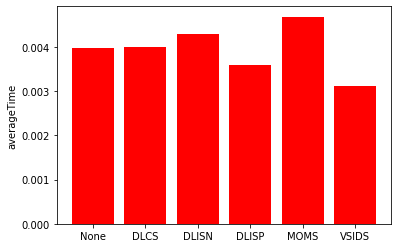

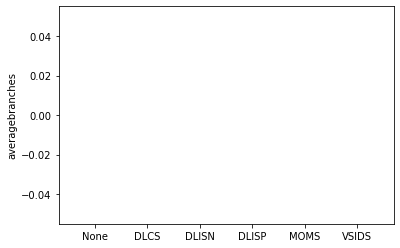

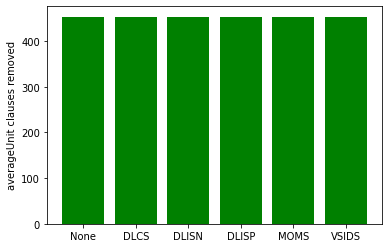

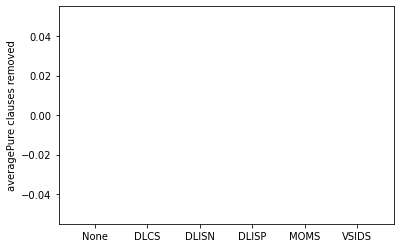

In [82]:
def makebarplots(sudokuSize=9, time=[], branches=[],unitCRemoved=[],pureCRemoved=[],
                   colors = ['red', 'cyan', 'green', 'purple'],
                   elementNames = ['Time', 'branches', 'Unit clauses removed', 'Pure clauses removed'],
                   heuristics =['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS']
                   ):
    elements = [time, branches, unitCRemoved, pureCRemoved]
    for heuristic in heuristics:
        if(sudokuSize == 9):
            df = pd.read_csv('9x9/'+heuristic+'.csv')
        elif(sudokuSize == 4):
            df = pd.read_csv('4x4/'+heuristic+'.csv')
        time.append(df["Time"].mean())
        branches.append(df["Branches"].mean())
        unitCRemoved.append(df["Unit clauses removed"].mean())
        pureCRemoved.append(df["Pure clauses removed"].mean())
    for element, name, color in zip(elements, elementNames, colors):
        fig, ax = plt.subplots()
        ax.set_ylabel('average'+name)
        plt.bar(heuristics, element, color=color)
        plt.show() 
        
makebarplots(sudokuSize=4) ## if you call this function from another cell it's broken
                           ## also calling it twice at once breaks it, idk man something with matplotlib


['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS'] [1.02416934967041, 1.865163540840149, 1.2769740700721741, 1.0258127093315124, 1.0485722422599792, 1.0342458963394165]
['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS'] [2.8, 135.8, 38.95, 3.2, 3.15, 7.5]
['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS'] [12090.75, 12658.05, 12353.7, 12156.2, 12209.75, 12105.0]
['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS'] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


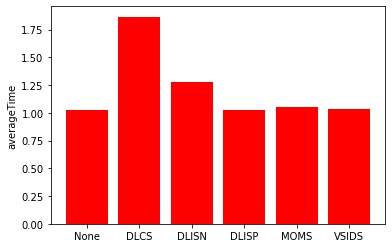

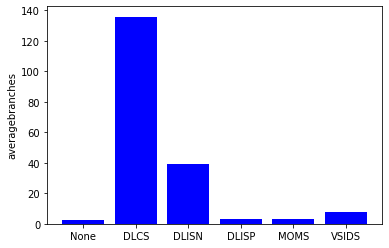

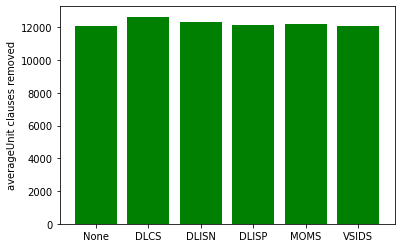

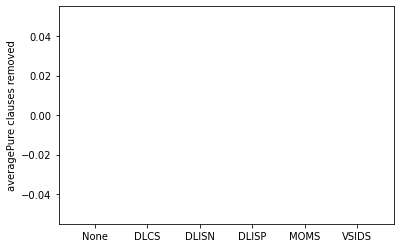

['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS'] [0.003989183902740436, 0.00400247573852535, 0.00428496599197384, 0.0035890102386474353, 0.004686415195465065, 0.00312571525573729]
['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS'] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS'] [453.1, 453.1, 453.1, 453.1, 453.1, 453.1]
['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS'] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


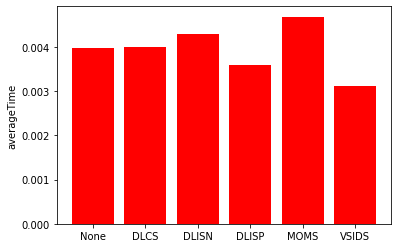

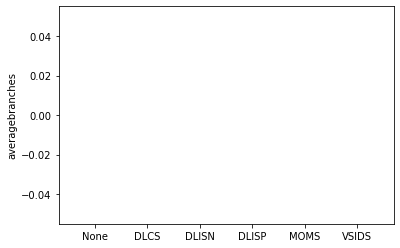

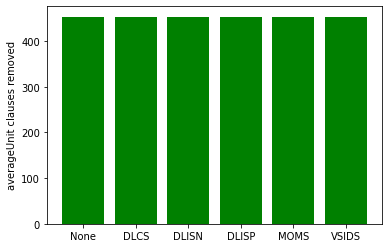

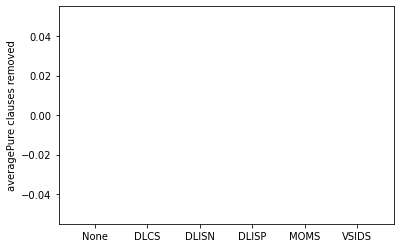

In [83]:
colors = ['red', 'blue', 'green', 'purple']
elementNames = ['Time', 'branches', 'Unit clauses removed', 'Pure clauses removed']
heuristics =['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS']


sizes = ['9x9','4x4']
for size in sizes:
    time=[]
    branches=[]
    unitCRemoved=[]
    pureCRemoved=[]
    elements = [time, branches, unitCRemoved, pureCRemoved]
    for heuristic in heuristics:
        filename = size+'/'+heuristic+'.csv'
        df = pd.read_csv(filename)
        time.append(df["Time"].mean())
        branches.append(df["Branches"].mean())
        unitCRemoved.append(df["Unit clauses removed"].mean())
        pureCRemoved.append(df["Pure clauses removed"].mean())
    for element, name, color in zip(elements, elementNames, colors):
        fig, ax = plt.subplots()
        ax.set_ylabel('average'+name)
        print(heuristics, element)
        plt.bar(heuristics, element, color=color)
    plt.show() 